# Ultimate Take Home Challenge

### Date: _12/18/2017_

### Candidate: Karl Konz

### Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

### Strategy

First import packages to work with the data, then open and load the login data.

In [70]:
# import the appropriate packages to work with the data
import json
import pandas as pd
from pandas.io.json import json_normalize

In [71]:
with open('c:/users/karlk/ultimate_challenge/logins.json') as f:
    logins = json.load(f)

Next, make the logins data a pandas dataframe and create a count variable that will then be aggregated by 15 minute intervals and counted.

In [72]:
# Create pandas dataframe
logins = pd.DataFrame(logins)
# Create count column
logins['Count'] = 1

Below we cast the login_time as a pandas DateTimeIndex and set as the index.

In [73]:
# Cast login_time as date time index and set as the dataframe index
logins = logins.set_index(pd.DatetimeIndex(logins['login_time']))

Next aggregate the data set by 15 minute increments, sum the counts, and fill in null or missing values with 0.

In [74]:
# Create a copy of the login counts pandas object
loginsCount = logins.Count
# Aggregate by 15 mins, sum the counts, and fill in na values with 0
loginsCount = logins.resample('15T').sum().fillna(0)
# Examine the first 5 rows of the new data set
loginsCount.head()

,Count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


To get a better idea of utilization trends we will plot the loginsCount data with matplotlib.

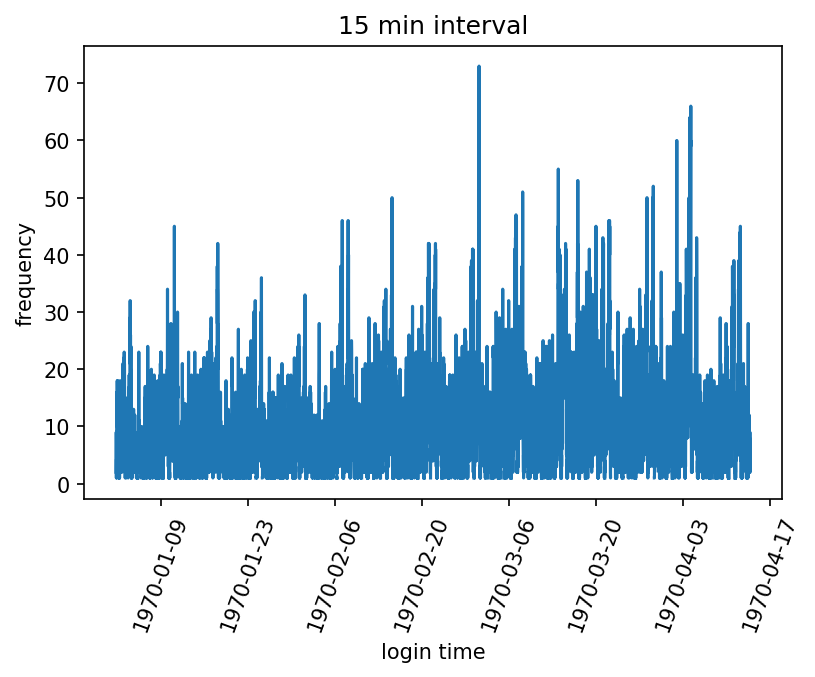

In [75]:
# inline matplot magic
% matplotlib inline
# import matplotlib package
import matplotlib.pyplot as plt
# increase the size of the plot
plt.rcParams['figure.dpi'] = 150
# add loginsCount data to the plt object
plt.plot(loginsCount)
# create the y label
plt.ylabel('frequency')
# create the x label
plt.xlabel('login time')
# create the title
plt.title('15 min interval')
# rotate the x-axis labels so they don't overlap
plt.xticks(rotation=70)
# Display the plt object
plt.show()

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

#### 1. What would you choose as the key measure of success of this experiment in
#### encouraging driver partners to serve both cities, and why would you choose this metric?

#### 2. Describe a practical experiment you would design to compare the effectiveness of the
#### proposed change in relation to the key measure of success. Please provide details on:

 a. how you will implement the experiment
 
 b. what statistical test(s) you will conduct to verify the significance of the
 observation
 
 c. how you would interpret the results and provide recommendations to the city
 operations team along with any caveats.

1. To measure the effectiveness of the initiative, I would want to see a higher proportion of drivers with trips to both cities. I would chose this as a starting point because we would expect records in both cities for a given driver if they are actually using the bridge. However if ROI is an issue and we need to make sure that we are budgeting correctly, then we may want to examine the dollars lost from the program versus utilization.

2a. This would be an observational analysis so nothing would need to be implemented to start. Perhaps the finds would require further analysis.

2b. A z-test for measuring the proportion of records in both cities for each user before and after the tolls are lifted or a chi-sqaured test could work as well.

2c. First, we would want to make sure that there is evidence of a statistical difference between the 2 groups. A one tail test may be appropriate if we only care if there is an increase, though a 2 tailed test may work if we think for whatever reason the utilization may go down.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
 data for this analysis (a few sentences/plots describing your approach will suffice). What
 fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
 in their 6th month on the system. Discuss why you chose your approach, what
 alternatives you considered, and any concerns you have. How valid is your model?
 Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
 improve its longterm
 rider retention (again, a few sentences will suffice).

First read open the ultimate data, load, and then process as a pandas dataframe.

In [76]:
# Read the ultimate data
with open('c:/users/karlk/ultimate_challenge/ultimate_data_challenge.json') as f:
    challenge = pd.DataFrame(json.load(f))

In [77]:
# Examine the head of the ultimate challenge data
challenge.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


To measure retention we can take the length of the challenge data in which there were trips in the first 30 days divided by the len of the entire dataframe.

In [78]:
#retention 
len(challenge[challenge['trips_in_first_30_days'] > 0]) / len(challenge)

0.6922

Next create a column to indicate if a user utilized the service 6 months later

In [79]:
# import numpy package
import numpy as np

# convert signup date to date time
challenge['signup_date'] = pd.to_datetime(challenge['signup_date'])
# convert last trip date to date time
challenge['last_trip_date'] = pd.to_datetime(challenge['last_trip_date'])
# create a number of months used column by month
challenge['nb_months'] = (challenge.last_trip_date - challenge.signup_date)/ np.timedelta64(1, 'M')
# create a dummy variable for if nb_months is greater then or equal to 6 months
challenge['ret6months'] = np.where(challenge['nb_months'] >=6, 1, 0)

Check the number of records that have been active up to 6 months 

In [80]:
len(challenge[challenge['ret6months'] == 1])

0

If we literally measure 6 months or greater the data does not show any hits! This is obviously a concern and would need to be addressed.
For now we will round nb_monts which should then give us some hits.

In [81]:
challenge['nb_months'].head()

0    4.698248
1    3.154069
2    0.032855
3    5.585330
4    1.544180
Name: nb_months, dtype: float64

In [82]:
challenge['ret6monthsRounded'] = np.where(np.round(challenge['nb_months']) >=6, 1, 0)

Next we will calculate the proportion of 6 month retained users, if this is less than .3 we will need to consider SMOTE or over/under sampling

In [83]:
len(challenge[challenge['ret6monthsRounded'] == 1])/len(challenge)

0.07036

Here we can see that the proportion of riders retained after 6 months is imbalanced.

In [84]:
# load appropriate packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

Now we will input any missing values with the mean

In [85]:
challenge['avg_dist'] = challenge.fillna((challenge['avg_dist'].mean()), inplace=True)
challenge.fillna((challenge['avg_rating_by_driver'].mean()), inplace=True)
challenge.fillna((challenge['avg_surge'].mean()), inplace=True)
challenge.fillna((challenge['surge_pct'].mean()), inplace=True)

First transform the categorical variables into one encodings so we can model the data

In [86]:
challenge_enconded = pd.get_dummies(challenge[['avg_dist', 
                                               'avg_rating_by_driver',
                                               'avg_surge',
                                               'surge_pct',
                                               'city',
                                               'phone',
                                               'surge_pct',
                                               'trips_in_first_30_days',
                                               'ultimate_black_user',
                                               'weekday_pct',
                                               'nb_months',
                                               'ret6monthsRounded']])

Next setup the data to be split and create the test and training data

In [88]:
# Set up the data to be split
training_features, test_features, training_target, test_target, = train_test_split(challenge_enconded.drop(['ret6monthsRounded'], axis=1),
                                               challenge_enconded['ret6monthsRounded'],
                                               test_size = .1,
                                               random_state=12)

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)


Use SMOTE to balance the data

In [103]:
sm = SMOTE(random_state=12, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\karlk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [104]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [105]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))
print('\nTest Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))


Validation Results
1.0
1.0

Test Results
1.0
1.0


Hmm well that is suspicious, I highly doubt we can generalize this model. Let's take a step back and just use a decision tree instead

In [106]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_res, y_train_res)
Pred= clf.predict(x_val)

In [107]:
print('Confusion matrix for Decision Tree')
print(confusion_matrix(y_val, Pred))
print('Test accuracy: '+str(accuracy_score(y_val, Pred)))

Confusion matrix for Decision Tree Classifier with criterion gini index
[[4181    0]
 [   0  319]]
Test accuracy: 1.0


Wow, still 100% accuracy. Let's take one more step back and calculate a logistic regression.

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
Pred= LR.predict(x_val)

In [110]:
print('Confusion matrix for Log Regression')
print(confusion_matrix(y_val, Pred))

print('Test accuracy: '+str(accuracy_score(y_val, Pred)))

Confusion matrix for Decision Tree Classifier with criterion gini index
[[4178    3]
 [   2  317]]
Test accuracy: 0.998888888889


## Conclusion

After addressing the imbalanced issue it seems we may have created some useful models, although the random forest, decision tree, and logistic regression may all be overfitting the data.
The proportion of 6 month retention is very small in comparison to the non-6 month retained users. The next step would be to monitor the results of the model(s) in real time. Another strategy may be to use an ensemble of different models.